In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('bank_note_data.csv')

In [4]:
df.head(2)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


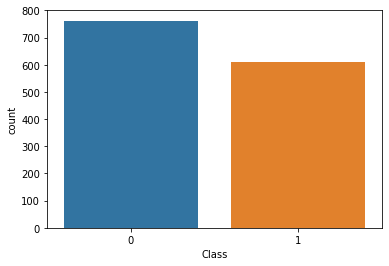

In [7]:
sns.countplot(df['Class'])

In [8]:
df.corr()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
Image.Var,1.000000,0.264026,-0.380850,0.276817,-0.724843
Image.Skew,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Image.Curt,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


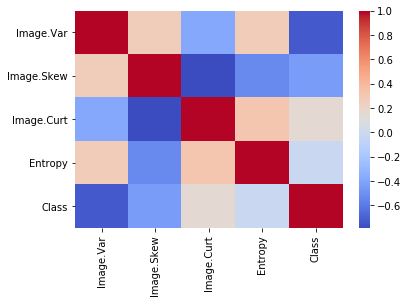

In [9]:
sns.heatmap(df.corr(),cmap='coolwarm')

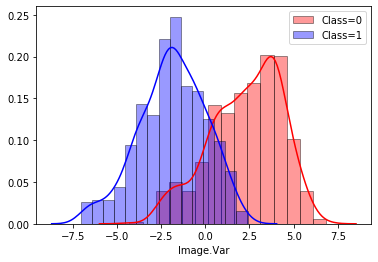

In [10]:
sns.distplot(df[df['Class']==0]['Image.Var'],bins=15,hist_kws=dict(edgecolor='black'),color='red',label='Class=0')
sns.distplot(df[df['Class']==1]['Image.Var'],bins=15,hist_kws=dict(edgecolor='black'),color='blue',label='Class=1')
plt.legend()

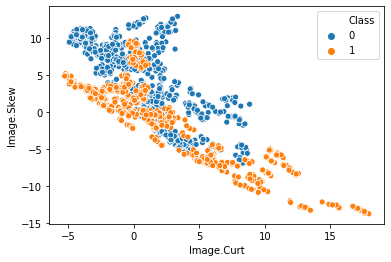

In [11]:
sns.scatterplot(x='Image.Curt',y='Image.Skew',data=df,hue='Class')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop('Class',axis=1).values
y=df['Class'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
classifier= RandomForestClassifier()

In [20]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
prediction=classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
print(confusion_matrix(y_test,prediction))

[[234   4]
 [  0 174]]


In [24]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [25]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.38 %
Standard Deviation: 0.95 %


In [ ]:
df[df['Class']==1].head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
762,-1.39710,3.31910,-1.392700,-1.99480,1
763,0.39012,-0.14279,-0.031994,0.35084,1
764,-1.66770,-7.15350,7.892900,0.96765,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
766,-3.56810,-8.21300,10.083000,0.96765,1


In [26]:
import joblib

In [27]:
joblib.dump(classifier,'my_model.pkl')

['my_model.pkl']